In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir('..')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ff1 = 'data/output/pairing_GA/dist_screen/'

In [3]:
allresults_tpr=[]
allresults_recall=[]
allresults_mode=[]

for f in sorted(list(os.listdir(ff1))):
    if ('.csv' in f):
        print(f)
        f1 = f.replace('n_repeats', 'nrepeats')
        f1 = f1.replace('distance_type', 'distanceType')
        f1 = f1.replace('GA-', '')
        # print(f1)
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        r = pd.read_csv(ff1+f, index_col=0)
        # print(r['alpha'].tolist())
        # print(r['correct_beta'].tolist())
        correctPairs = (r['alpha'] + '::' + r['correct_beta'] + '::' + r['subject-PMID']).tolist()
        R = pd.DataFrame()
        R_recall = pd.Series()
        for c in r.columns:
            if 'repeat' in c:
                pairs = (r['alpha'] + '::' + r[c] + '::' + r['subject-PMID']).tolist()
                R[c] = [p in correctPairs for p in pairs]
                recall = sum([int(p in correctPairs) for p in set(pairs)])
                # print(recall)
                R_recall[c]=recall
        # print(R_recall)
        results = pd.DataFrame(R.sum(), columns=['num_correct']).reset_index(names='repeat')
        results['epitope'] = properties['epitope']
        results['distance']=properties['distanceType']
        results['k'] = properties['kNN']
        results['N'] = r.shape[0] 
        results['prop_correct'] = results['num_correct']/results['N']       
        allresults_tpr.append(results)

        results = pd.DataFrame(R_recall, columns=['num_correct']).reset_index(names='repeat')
        results['epitope'] = properties['epitope']
        results['distance']=properties['distanceType']
        results['k'] = properties['kNN']
        results['N'] = r.shape[0] 
        results['prop_correct'] = results['num_correct']/results['N']       
        allresults_recall.append(results)

        Rmode = r[['mode','correct','mode_freq']].copy()
        Rmode['epitope'] = properties['epitope']
        Rmode['distance']=properties['distanceType']
        Rmode['k'] = properties['kNN']
        Rmode['N'] = r.shape[0] 
        allresults_mode.append(Rmode)

GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-100_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-10_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-1_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-50_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-5_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-tcrdist_kNN-100_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-tcrdist_kNN-10_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-tcrdist_kNN-1_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-tcrdist_kNN-20_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-tcrdist_kNN-50_n_repeats-100.csv.gz
GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-tcrdist_kNN-5_n_r

In [4]:
results.head()

,repeat,num_correct,epitope,distance,k,N,prop_correct
0,repeat1,19,YLQPRTFLL,weightedlev,5,333,0.057057
1,repeat2,19,YLQPRTFLL,weightedlev,5,333,0.057057
2,repeat3,13,YLQPRTFLL,weightedlev,5,333,0.039039
3,repeat4,15,YLQPRTFLL,weightedlev,5,333,0.045045
4,repeat5,12,YLQPRTFLL,weightedlev,5,333,0.036036


In [5]:
all_results_tpr = pd.concat(allresults_tpr)
all_results_recall = pd.concat(allresults_recall)
print(all_results_recall)

       repeat  num_correct    epitope     distance    k    N  prop_correct
0     repeat1           59  GLCTLVAML          lev  100  345      0.171014
1     repeat2           55  GLCTLVAML          lev  100  345      0.159420
2     repeat3           51  GLCTLVAML          lev  100  345      0.147826
3     repeat4           58  GLCTLVAML          lev  100  345      0.168116
4     repeat5           52  GLCTLVAML          lev  100  345      0.150725
..        ...          ...        ...          ...  ...  ...           ...
95   repeat96           18  YLQPRTFLL  weightedlev    5  333      0.054054
96   repeat97           18  YLQPRTFLL  weightedlev    5  333      0.054054
97   repeat98           17  YLQPRTFLL  weightedlev    5  333      0.051051
98   repeat99           17  YLQPRTFLL  weightedlev    5  333      0.051051
99  repeat100           12  YLQPRTFLL  weightedlev    5  333      0.036036

[4800 rows x 7 columns]


In [6]:
all_results_tpr['k'] = all_results_tpr['k'].astype('int')
all_results_recall['k'] = all_results_recall['k'].astype('int')

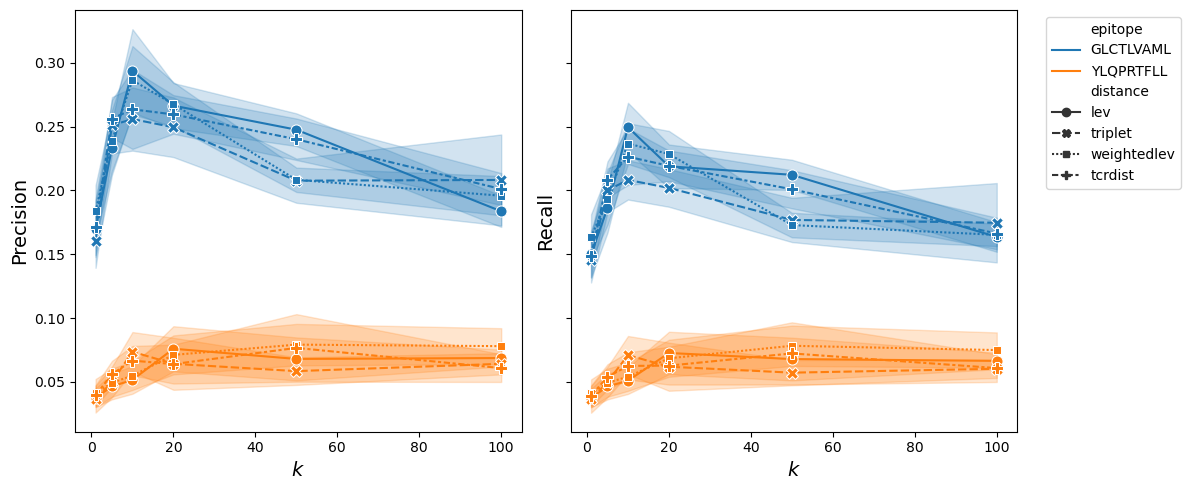

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.lineplot(all_results_tpr.sort_values(by='epitope'), x='k', y='prop_correct', 
             hue='epitope', style='distance', markersize=8, markers=True, alpha=1,
            #  err_kws={'capsize':3, 'elinewidth':1, 'capthick':1, 'barsabove':False, 'ecolor':'k'},
             errorbar='sd', ax=ax[0])
sns.lineplot(all_results_recall.sort_values(by='epitope'), x='k', y='prop_correct', 
             hue='epitope', style='distance', markersize=8, markers=True, alpha=1,
            #  err_kws={'capsize':3, 'elinewidth':1, 'capthick':1, 'barsabove':False, 'ecolor':'k'},
             errorbar='sd', ax=ax[1])
ax[0].get_legend().remove()
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticklabels('')
ax[1].legend(bbox_to_anchor=[1.05,1], loc='upper left')
ax[0].set_ylabel('Precision', fontdict={'size':14})
ax[1].set_ylabel('Recall', fontdict={'size':14})
ax[0].set_xlabel(r'$k$', fontdict={'size':14})
ax[1].set_xlabel(r'$k$', fontdict={'size':14})
plt.tight_layout()
plt.savefig('figures/GA_kscreen.png',
                    bbox_inches='tight')
plt.show()

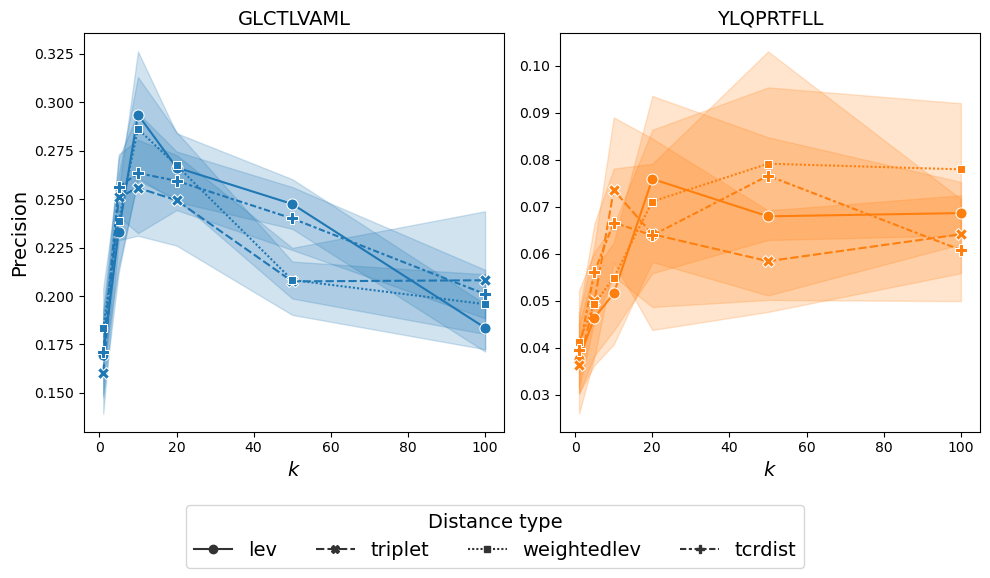

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.lineplot(all_results_tpr.loc[all_results_tpr['epitope'] == 'GLCTLVAML'].sort_values(by='epitope'), x='k', y='prop_correct', 
             style='distance', markersize=8, markers=True, alpha=1,c='#1f77b4',
            #  err_kws={'capsize':3, 'elinewidth':1, 'capthick':1, 'barsabove':False, 'ecolor':'k'},
             errorbar='sd', ax=ax[0])
sns.lineplot(all_results_tpr.loc[all_results_tpr['epitope'] == 'YLQPRTFLL'].sort_values(by='epitope'), x='k', y='prop_correct', 
             style='distance', markersize=8, markers=True, alpha=1,c = '#ff7f0e',
            #  err_kws={'capsize':3, 'elinewidth':1, 'capthick':1, 'barsabove':False, 'ecolor':'k'},
             errorbar='sd', ax=ax[1])
ax[0].legend().remove()
ax[1].legend().remove()
handles, labels = ax[0].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique),bbox_to_anchor=[0.5,0], loc='upper center', ncols=4, title = 'Distance type', 
                               fontsize=14, title_fontsize=14)
ax[0].set_title('GLCTLVAML', fontsize=14)
ax[1].set_title('YLQPRTFLL', fontsize=14)
ax[0].set_ylabel('Precision', fontdict={'size':14})
ax[1].set_ylabel('', fontdict={'size':14})
ax[0].set_xlabel(r'$k$', fontdict={'size':14})
ax[1].set_xlabel(r'$k$', fontdict={'size':14})
plt.tight_layout()
plt.savefig('figures/GA_kscreen-TPRonly.png',
                    bbox_inches='tight')
plt.show()

In [9]:
mode_results = pd.concat(allresults_mode)

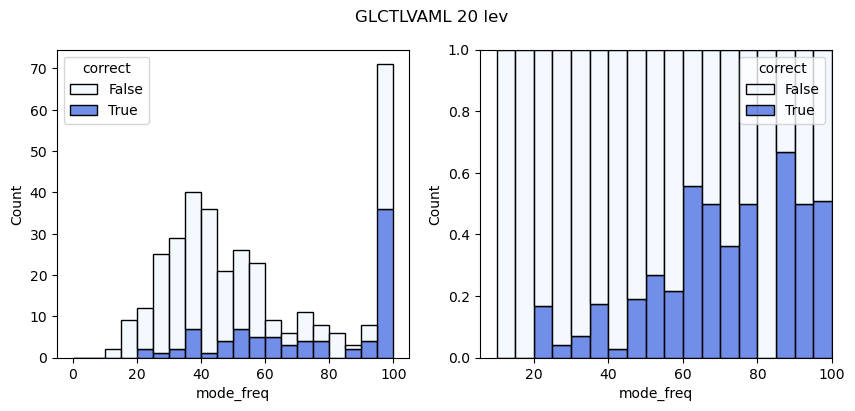

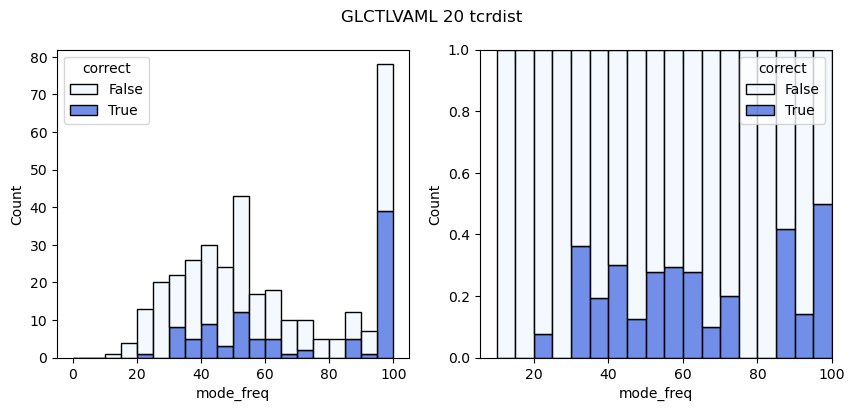

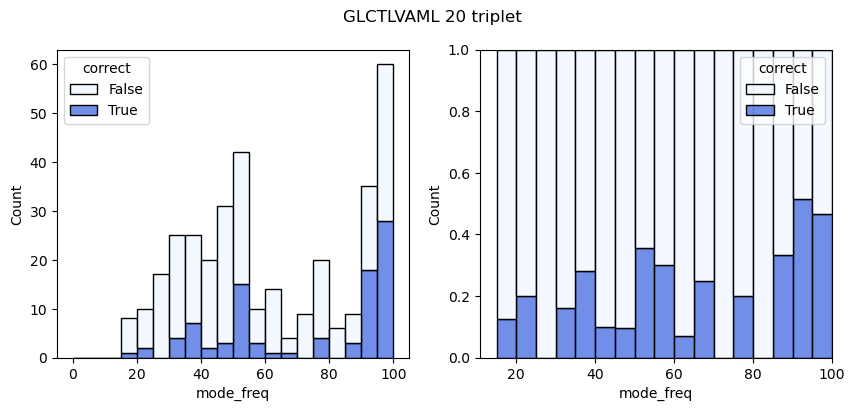

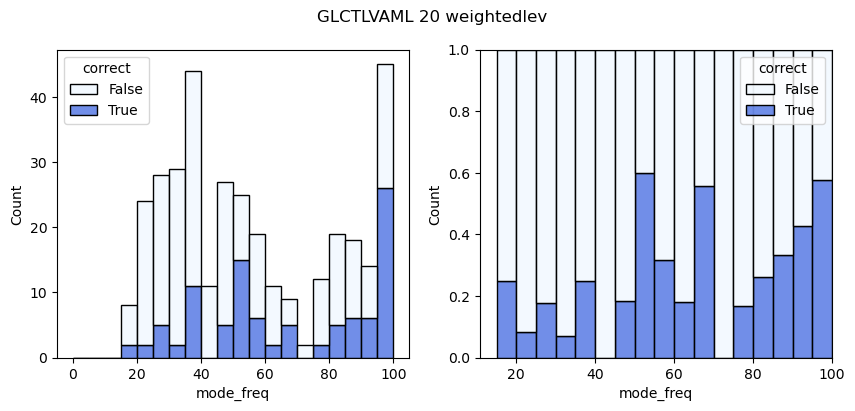

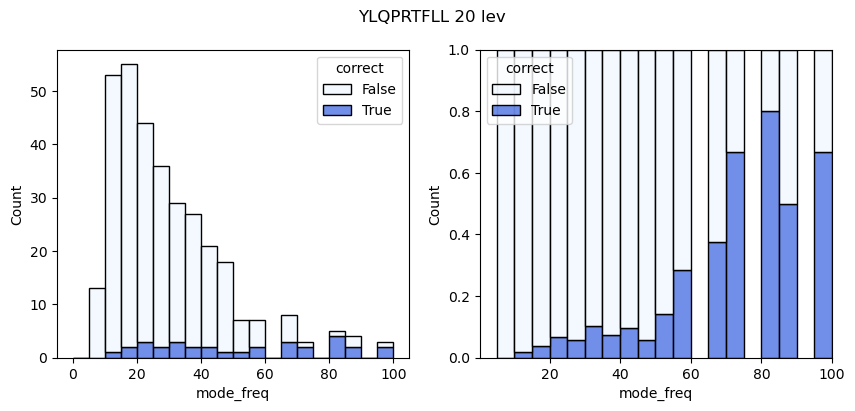

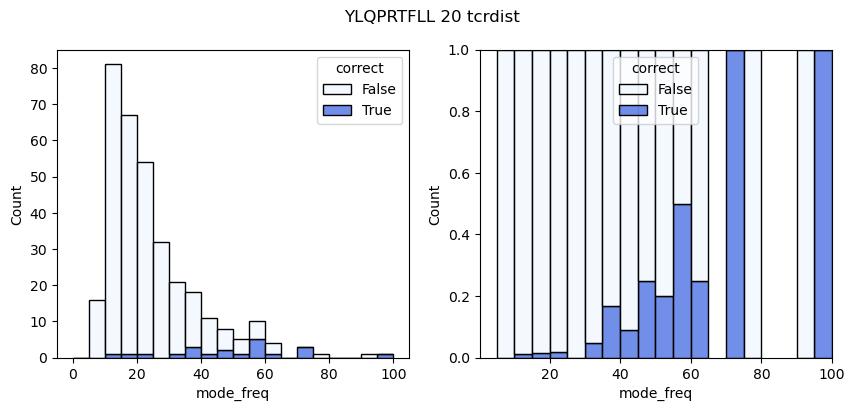

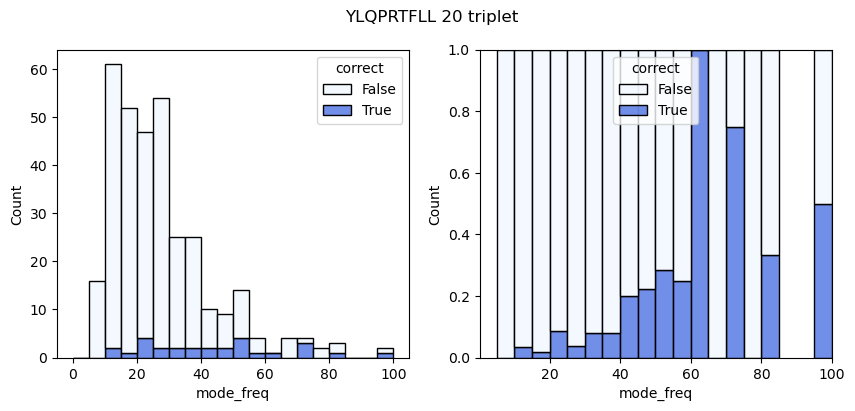

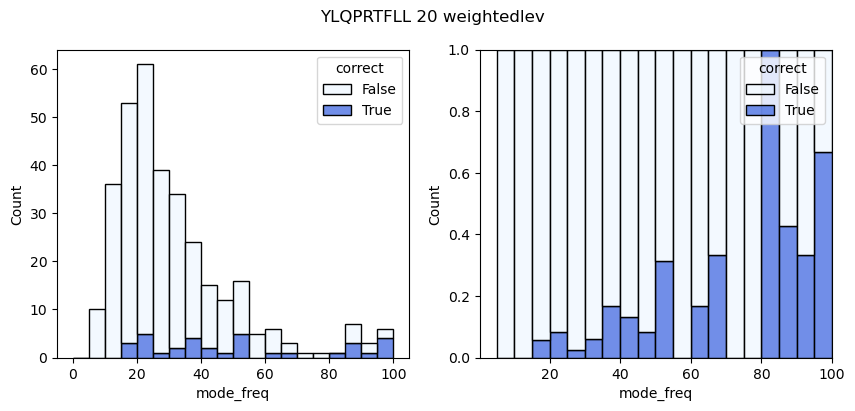

In [10]:
k = '20'

for ep in mode_results['epitope'].unique():
    # for k in mode_results['k'].unique():
    for dist in mode_results['distance'].unique():
        ss = mode_results.loc[(mode_results['k'] == k) & (mode_results['distance']==dist) & (mode_results['epitope']==ep)]

        fig, ax = plt.subplots(ncols=2, figsize=(10,4))
        sns.histplot(data=ss, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
                multiple='stack', binwidth=5, binrange=(0,100), ax=ax[0])
        sns.histplot(data=ss, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
                multiple='fill', binwidth=5, binrange=(0,100), ax=ax[1])
        # fig.suptitle(properties['epitope'] + ', ' + properties['confidence'] + ', ' + properties['L'], fontsize=16)
        # handles = ax[0].get_legend().legendHandles
        # labels = ['Mode not correct', 'Mode correct']
        # fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor = [0.5,-0.05], fontsize=14)
        # ax[0].set_xlabel('Frequency of mode', fontdict={'size':14})
        # ax[0].set_ylabel('Count at frequency', fontdict={'size':14})
        # ax[1].set_xlabel('Frequency of mode', fontdict={'size':14})
        # ax[1].set_ylabel('Proportion at frequency', fontdict={'size':14})
        # ax[0].get_legend().remove()
        # ax[1].get_legend().remove()
        # plt.tight_layout()
        # plt.savefig(save_folder + properties['epitope'] + '_' + properties['confidence'] + '_' + properties['L'] + '_mode_correctness.png',
        #             bbox_inches="tight")
        fig.suptitle(ep + ' ' + k + ' ' + dist)
        plt.show()